In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Unsupervised Learning Part 1 -- Transformation


Many instances of unsupervised learning, such as dimensionality reduction, manifold learning, and feature extraction, find a new representation of the input data without any additional input. (In contrast to supervised learning, usnupervised algorithms don't require or consider target variables like in the previous classification and regression examples). 

<img src="figures/unsupervised_workflow.svg" width="100%">

A very basic example is the rescaling of our data, which is a requirement for many machine learning algorithms as they are not scale-invariant -- rescaling falls into the category of data pre-processing and can barely be called *learning*. There exist many different rescaling technques, and in the following example, we will take a look at a particular method that is commonly called "standardization." Here, we will recale the data so that each feature is centered at zero (mean = 0) with unit variance (standard deviation = 0).

For example, if we have a 1D dataset with the values [1, 2, 3, 4, 5], the standardized values are

- 1 -> -1.41
- 2 -> -0.71
- 3 -> 0.0
- 4 -> 0.71
- 5 -> 1.41

computed via the equation $x_{standardized} = \frac{x - \mu_x}{\sigma_x}$,
where $\mu$ is the sample mean, and $\sigma$ the standard deviation, respectively.






In [3]:
ary = np.array([1, 2, 3, 4, 5])
ary_standardized = (ary - ary.mean()) / ary.std()
ary_standardized

array([-1.41421356, -0.70710678,  0.        ,  0.70710678,  1.41421356])

Although standardization is a most basic preprocessing procedure -- as we've seen in the code snipped above -- scikit-learn implements a `StandardScaler` class for this computation. And in later sections, we will see why and when the scikit-learn interface comes in handy over the code snippet we executed above.  

Applying such a preprocessing has a very similar interface to the supervised learning algorithms we saw so far.
To get some more practice with scikit-learn's "Transformer" interface, let's start by loading the iris dataset and rescale it:


In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print(X_train.shape)

(112, 4)


The iris dataset is not "centered" that is it has non-zero mean and the standard deviation is different for each component:


In [5]:
print("mean : %s " % X_train.mean(axis=0))
print("standard deviation : %s " % X_train.std(axis=0))

mean : [5.88660714 3.05178571 3.79642857 1.22321429] 
standard deviation : [0.86741565 0.43424445 1.79264014 0.77793019] 


To use a preprocessing method, we first import the estimator, here StandardScaler and instantiate it:
    

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

As with the classification and regression algorithms, we call ``fit`` to learn the model from the data. As this is an unsupervised model, we only pass ``X``, not ``y``. This simply estimates mean and standard deviation.

In [7]:
scaler.fit(X_train)

StandardScaler()

Now we can rescale our data by applying the ``transform`` (not ``predict``) method:

In [9]:
X_train_scaled = scaler.transform(X_train)

``X_train_scaled`` has the same number of samples and features, but the mean was subtracted and all features were scaled to have unit standard deviation:

In [10]:
print(X_train_scaled.shape)

(112, 4)


In [11]:
print("mean : %s " % X_train_scaled.mean(axis=0))
print("standard deviation : %s " % X_train_scaled.std(axis=0))

mean : [ 1.21331516e-15 -4.41115398e-17  7.13714802e-17 -3.66770106e-16] 
standard deviation : [1. 1. 1. 1.] 


To summarize: Via the `fit` method, the estimator is fitted to the data we provide. In this step, the estimator estimates the parameters from the data (here: mean and standard deviation). Then, if we `transform` data, these parameters are used to transform a dataset. (Please note that the transform method does not update these parameters).

It's important to note that the same transformation is applied to the training and the test set. That has the consequence that usually the mean of the test data is not zero after scaling:

In [13]:
X_test_scaled = scaler.transform(X_test)
print("mean test data: %s" % X_test_scaled.mean(axis=0))

mean test data: [-0.19692712  0.05042896 -0.08461917 -0.12117658]


It is important for the training and test data to be transformed in exactly the same way, for the following processing steps to make sense of the data, as is illustrated in the figure below:

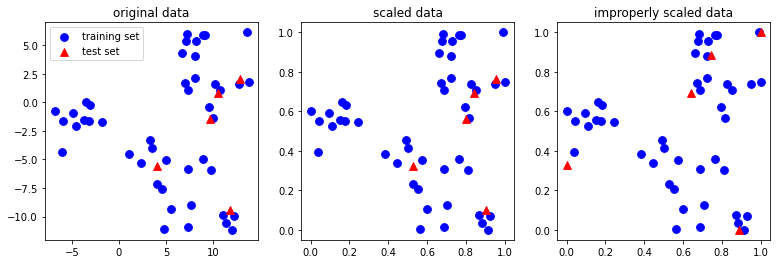

In [14]:
from figures import plot_relative_scaling
plot_relative_scaling()

There are several common ways to scale the data. The most common one is the ``StandardScaler`` we just introduced, but rescaling the data to a fix minimum an maximum value with ``MinMaxScaler`` (usually between 0 and 1), or using more robust statistics like median and quantile, instead of mean and standard deviation (with ``RobustScaler``), are also useful.

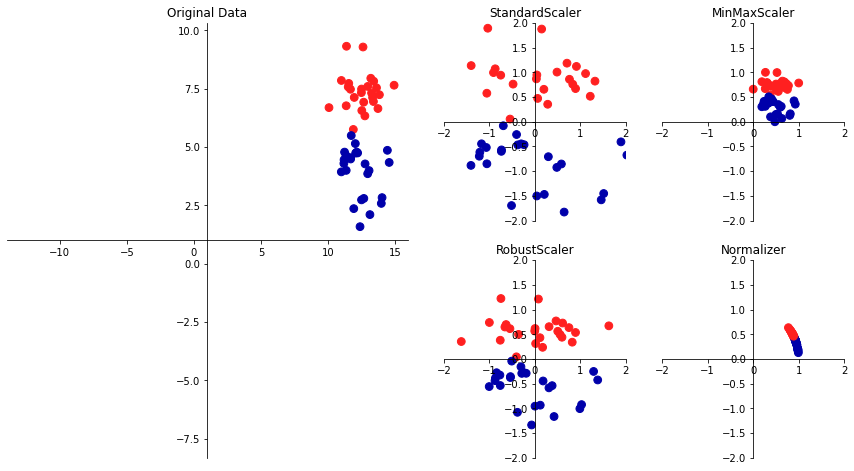

In [15]:
from figures import plot_scaling
plot_scaling()